In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
to_cmplx ={'A':1j,'C':-1,'G':1, 'R':1j, 'M': 1j, 'K':1, 'S':-1,
           'T':-1j, 'Y':-1, 'R':1j, 'W':1j, 'N':1j} #Y->C, T or U; R->A or G; W-> A, T or U;
                                                    #N->A C G T U; R-> A or G; M->A or C; K-> G, T or U
                                                    #S->C or G

def s2cmlx(s):
    return np.array([to_cmplx[c] for c in s])

In [53]:
f = open('./sequence.fasta','r')
virus_names = []
virus_dict = {}
new_genome = False
virus_genome = ""
virus_name = ""

for l in f.readlines():
    if l.startswith('\n'):
        new_genome = False
        virus_dict[virus_name]=s2cmlx(virus_genome)
        #print(f"END{virus_name}")
    if l.startswith('>'):
        new_genome = True
        virus_name = l[1:-1]
        virus_names.append(virus_name)
        virus_genome = ""
        #print(f"START{virus_name}")
    if (l.startswith('A')) or (l.startswith('T')) or (l.startswith('G')) or (l.startswith('C')):
        virus_genome = virus_genome + l[0:-1]
    

f.close()

## Simple Plot

In [79]:
c = np.correlate(virus_dict['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'],
             virus_dict['NC_001802.1 Human immunodeficiency virus 1, complete genome'], "full")

[]

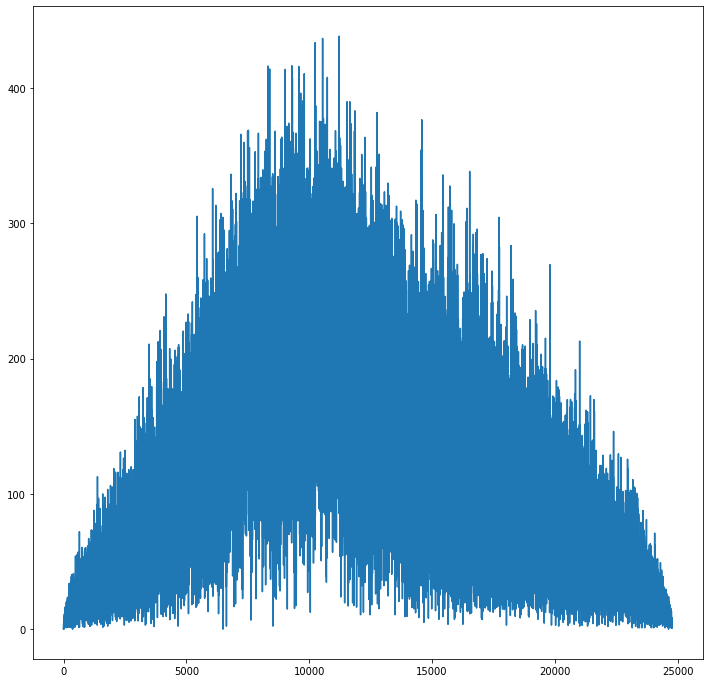

In [84]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(np.absolute(c))
plt.plot()

## Simple similarity analysis

In [87]:
similarity_dict={}
for v,g in virus_dict.items():
    if v!='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome':
        xcorr = np.correlate(virus_dict['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'],
             virus_dict[v], "full")
        similarity_dict[v]=[np.mean(np.absolute(xcorr)), np.max(np.absolute(xcorr)), len(np.absolute(xcorr))]
        #print(f'{v} mean: {np.mean(np.absolute(xcorr))}, max: {np.max(np.absolute(xcorr))}, size: {len(np.absolute(xcorr))}')

In [101]:
similarity_df = pd.DataFrame(similarity_dict).transpose()
similarity_df.columns=['Crosscorrelation Mean','Crosscorrelation Max','Crosscorrelation Vector size']

In [105]:
similarity_df.sort_values('Crosscorrelation Mean',ascending=False).head(30)

,Crosscorrelation Mean,Crosscorrelation Max,Crosscorrelation Vector size
"NC_006577.2 Human coronavirus HKU1, complete genome",214.110193,2188.102603,59828.0
"NC_005831.2 Human Coronavirus NL63, complete genome",193.481550,1845.108398,57455.0
"NC_006213.1 Human coronavirus OC43 strain ATCC VR-759, complete genome",180.208240,2000.356968,60643.0
"NC_003045.1 Bovine coronavirus, complete genome",178.448796,2191.086717,60930.0
"NC_028752.1 Camel alphacoronavirus isolate camel/Riyadh/Ry141/2015, complete genome",173.262155,1716.427977,57297.0
"NC_002645.1 Human coronavirus 229E, complete genome",170.539295,1997.634852,57219.0
"NC_004718.3 SARS coronavirus, complete genome",170.076342,13139.192251,59653.0
"NC_038294.1 Betacoronavirus England 1, complete genome",162.432174,3405.716518,60013.0
"NC_019843.3 Middle East respiratory syndrome coronavirus, complete genome",162.293499,3403.219652,60021.0
"NC_010800.1 Turkey coronavirus, complete genome",161.693833,1624.423898,57559.0
